In [1]:
import pandas as pd
import numpy as np

In [4]:
data_orig = pd.read_excel("/content/climate_change_download_0.xls", sheet_name="Data", engine="xlrd")

In [6]:
print("Shape of the original dataset:")
data_orig.shape

Shape of the original dataset:


(13512, 28)

In [7]:
print("Available columns:")
data_orig.columns

Available columns:


Index(['Country code', 'Country name',  'Series code',  'Series name',
              'SCALE',     'Decimals',           1990,           1991,
                 1992,           1993,           1994,           1995,
                 1996,           1997,           1998,           1999,
                 2000,           2001,           2002,           2003,
                 2004,           2005,           2006,           2007,
                 2008,           2009,           2010,           2011],
      dtype='object')

In [8]:
print("Column data types:")
data_orig.dtypes

Column data types:


Country code    object
Country name    object
Series code     object
Series name     object
SCALE           object
Decimals        object
1990            object
1991            object
1992            object
1993            object
1994            object
1995            object
1996            object
1997            object
1998            object
1999            object
2000            object
2001            object
2002            object
2003            object
2004            object
2005            object
2006            object
2007            object
2008            object
2009            object
2010            object
2011            object
dtype: object

In [9]:
data_orig.head()

Country code Country name     Series code  \
0          ABW        Aruba  AG.LND.EL5M.ZS   
1          ADO      Andorra  AG.LND.EL5M.ZS   
2          AFG  Afghanistan  AG.LND.EL5M.ZS   
3          AGO       Angola  AG.LND.EL5M.ZS   
4          ALB      Albania  AG.LND.EL5M.ZS   

                           Series name SCALE Decimals      1990 1991 1992  \
0  Land area below 5m (% of land area)     0        1  29.57481   ..   ..   
1  Land area below 5m (% of land area)     0        1         0   ..   ..   
2  Land area below 5m (% of land area)     0        1         0   ..   ..   
3  Land area below 5m (% of land area)     0        1  0.208235   ..   ..   
4  Land area below 5m (% of land area)     0        1  4.967875   ..   ..   

  1993  ... 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011  
0   ..  ...   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  
1   ..  ...   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  
2   ..  ...   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  
3   ..  ...   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  
4   ..  ...   ..   ..   ..   ..   ..   ..   ..   ..   ..   ..  

[5 rows x 28 columns]

In [11]:
data_orig.describe()

Country code Country name     Series code  \
count         13512        13512           13512   
unique          233          233              58   
top             ABW        Aruba  AG.LND.EL5M.ZS   
freq             58           58             233   

                                Series name  SCALE  Decimals   1990   1991  \
count                                 13512  13512     13512  10017  10017   
unique                                   58      2         3   4355   3398   
top     Land area below 5m (% of land area)      0         1     ..     ..   
freq                                    233  10017      5823   5163   6520   

         1992   1993  ...   2002   2003   2004   2005   2006   2007   2008  \
count   10017  10017  ...  10017  10017  10017  10017  10017  10017  10017   
unique   3523   3583  ...   3877   3869   4007   4484   4008   4047   4080   
top        ..     ..  ...     ..     ..     ..     ..     ..     ..     ..   
freq     6364   6300  ...   5960   5974   5792   4933   5781   5769   5414   

         2009   2010   2011  
count   10017  10017  12382  
unique   3506   2164   1434  
top        ..     ..     ..  
freq     6256   7685  10244  

[4 rows x 28 columns]

In [12]:
data_orig['Series name'].unique()

array(['Land area below 5m (% of land area)',
       'Agricultural land under irrigation (% of total ag. land)',
       'Cereal yield (kg per hectare)',
       'Foreign direct investment, net inflows (% of GDP)',
       'Access to electricity (% of total population)',
       'Energy use per units of GDP (kg oil eq./$1,000 of 2005 PPP $)',
       'Energy use per capita (kilograms of oil equivalent)',
       'CO2 emissions, total (KtCO2)',
       'CO2 emissions per capita (metric tons)',
       'CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)',
       'Other GHG emissions, total (KtCO2e)',
       'Methane (CH4) emissions, total (KtCO2e)',
       'Nitrous oxide (N2O) emissions, total (KtCO2e)',
       'Annex-I emissions reduction target',
       'Disaster risk reduction progress score (1-5 scale; 5=best)',
       'GHG net emissions/removals by LUCF (MtCO2e)',
       'Hosted Clean Development Mechanism (CDM) projects',
       'Hosted Joint Implementation (JI) projects',
       'Av

In [13]:
data_orig['Series code'].unique()

array(['AG.LND.EL5M.ZS', 'AG.LND.IRIG.AG.ZS', 'AG.YLD.CREL.KG',
       'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.ACCS.ZS', 'EG.USE.COMM.GD.PP.KD',
       'EG.USE.PCAP.KG.OE', 'EN.ATM.CO2E.KT', 'EN.ATM.CO2E.PC',
       'EN.ATM.CO2E.PP.GD.KD', 'EN.ATM.GHGO.KT.CE', 'EN.ATM.METH.KT.CE',
       'EN.ATM.NOXE.KT.CE', 'EN.CLC.AERT', 'EN.CLC.DRSK.XQ',
       'EN.CLC.GHGR.MT.CE', 'EN.CLC.HCDM', 'EN.CLC.HJIP',
       'EN.CLC.HPPT.MM', 'EN.CLC.ICER', 'EN.CLC.IERU', 'EN.CLC.MDAT.ZS',
       'EN.CLC.MMDT.C', 'EN.CLC.NAMA', 'EN.CLC.NAPA', 'EN.CLC.NCOM',
       'EN.CLC.PCAT.C', 'EN.CLC.PCCC', 'EN.CLC.PCHW', 'EN.CLC.PCPT.MM',
       'EN.CLC.RNET', 'EN.POP.EL5M.ZS', 'EN.URB.MCTY.TL.ZS',
       'ER.H2O.FWTL.ZS', 'ER.LND.PTLD.ZS', 'IC.BUS.EASE.XQ',
       'IE.PPI.ENGY.CD', 'IE.PPI.TELE.CD', 'IE.PPI.TRAN.CD',
       'IE.PPI.WATR.CD', 'IQ.CPA.PUBS.XQ', 'IS.ROD.PAVE.ZS',
       'NY.GDP.MKTP.CD', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS',
       'SE.PRM.CMPT.ZS', 'SH.DYN.MORT', 'SH.H2O.SAFE.ZS',
       'SH.MED.NUMW.P3', 'S

In [14]:
data_orig['SCALE'].unique()

array([0, 'Text'], dtype=object)

In [15]:
data_orig['Decimals'].unique()

array([1, 0, 'Text'], dtype=object)

In [16]:
data_orig[data_orig['SCALE']=='Text']

Country code      Country name  Series code  \
3029          ABW             Aruba  EN.CLC.AERT   
3030          ADO           Andorra  EN.CLC.AERT   
3031          AFG       Afghanistan  EN.CLC.AERT   
3032          AGO            Angola  EN.CLC.AERT   
3033          ALB           Albania  EN.CLC.AERT   
...           ...               ...          ...   
7218          YEM       Yemen, Rep.  EN.CLC.RNET   
7219          ZAF      South Africa  EN.CLC.RNET   
7220          ZAR  Congo, Dem. Rep.  EN.CLC.RNET   
7221          ZMB            Zambia  EN.CLC.RNET   
7222          ZWE          Zimbabwe  EN.CLC.RNET   

                             Series name SCALE Decimals 1990 1991 1992 1993  \
3029  Annex-I emissions reduction target  Text     Text  NaN  NaN  NaN  NaN   
3030  Annex-I emissions reduction target  Text     Text  NaN  NaN  NaN  NaN   
3031  Annex-I emissions reduction target  Text     Text  NaN  NaN  NaN  NaN   
3032  Annex-I emissions reduction target  Text     Text  NaN  NaN  NaN  NaN   
3033  Annex-I emissions reduction target  Text     Text  NaN  NaN  NaN  NaN   
...                                  ...   ...      ...  ...  ...  ...  ...   
7218             Renewable energy target  Text     Text  NaN  NaN  NaN  NaN   
7219             Renewable energy target  Text     Text  NaN  NaN  NaN  NaN   
7220             Renewable energy target  Text     Text  NaN  NaN  NaN  NaN   
7221             Renewable energy target  Text     Text  NaN  NaN  NaN  NaN   
7222             Renewable energy target  Text     Text  NaN  NaN  NaN  NaN   

      ... 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011  
3029  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3030  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3031  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3032  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3033  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
7218  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ..  
7219  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  Yes  
7220  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ..  
7221  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ..  
7222  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ..  

[3495 rows x 28 columns]

In [17]:
data_orig[data_orig['Decimals']=='Text']

Country code      Country name  Series code  \
3029          ABW             Aruba  EN.CLC.AERT   
3030          ADO           Andorra  EN.CLC.AERT   
3031          AFG       Afghanistan  EN.CLC.AERT   
3032          AGO            Angola  EN.CLC.AERT   
3033          ALB           Albania  EN.CLC.AERT   
...           ...               ...          ...   
7218          YEM       Yemen, Rep.  EN.CLC.RNET   
7219          ZAF      South Africa  EN.CLC.RNET   
7220          ZAR  Congo, Dem. Rep.  EN.CLC.RNET   
7221          ZMB            Zambia  EN.CLC.RNET   
7222          ZWE          Zimbabwe  EN.CLC.RNET   

                             Series name SCALE Decimals 1990 1991 1992 1993  \
3029  Annex-I emissions reduction target  Text     Text  NaN  NaN  NaN  NaN   
3030  Annex-I emissions reduction target  Text     Text  NaN  NaN  NaN  NaN   
3031  Annex-I emissions reduction target  Text     Text  NaN  NaN  NaN  NaN   
3032  Annex-I emissions reduction target  Text     Text  NaN  NaN  NaN  NaN   
3033  Annex-I emissions reduction target  Text     Text  NaN  NaN  NaN  NaN   
...                                  ...   ...      ...  ...  ...  ...  ...   
7218             Renewable energy target  Text     Text  NaN  NaN  NaN  NaN   
7219             Renewable energy target  Text     Text  NaN  NaN  NaN  NaN   
7220             Renewable energy target  Text     Text  NaN  NaN  NaN  NaN   
7221             Renewable energy target  Text     Text  NaN  NaN  NaN  NaN   
7222             Renewable energy target  Text     Text  NaN  NaN  NaN  NaN   

      ... 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011  
3029  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3030  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3031  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3032  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3033  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
7218  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ..  
7219  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  Yes  
7220  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ..  
7221  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ..  
7222  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   ..  

[3495 rows x 28 columns]

In [18]:
data_clean = data_orig

In [19]:
print("Original number of rows:")
print(data_clean.shape[0])

Original number of rows:
13512


In [20]:
data_clean = data_clean[data_clean['SCALE']!='Text']

In [21]:
print("Current number of rows:")
print(data_clean.shape[0])

Current number of rows:
10017


In [22]:
print("Original number of columns:")
print(data_clean.shape[1])

Original number of columns:
28


In [23]:
data_clean = data_clean.drop(['Country name', 'Series code', 'SCALE', 'Decimals'], axis='columns')

In [24]:
print("Current number of columns:")
print(data_clean.shape[1])

Current number of columns:
24


In [26]:
data_clean.iloc[:,2:] = data_clean.iloc[:,2:].replace({'':np.nan, '..':np.nan})

/tmp/ipython-input-1081394343.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_clean.iloc[:,2:] = data_clean.iloc[:,2:].replace({'':np.nan, '..':np.nan})


In [27]:
data_clean2 = data_clean.applymap(lambda x: pd.to_numeric(x, errors='ignore'))
# Errors are ignored in order to avoid error messages about the first two columns, which don't need to be transformed
# into numeric type anyway

print("Print the column data types after transformation:")
data_clean2.dtypes

/tmp/ipython-input-2747640120.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_clean2 = data_clean.applymap(lambda x: pd.to_numeric(x, errors='ignore'))
/tmp/ipython-input-2747640120.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data_clean2 = data_clean.applymap(lambda x: pd.to_numeric(x, errors='ignore'))


Print the column data types after transformation:


Country code     object
Series name      object
1990            float64
1991            float64
1992            float64
1993            float64
1994            float64
1995            float64
1996            float64
1997            float64
1998            float64
1999            float64
2000            float64
2001            float64
2002            float64
2003            float64
2004            float64
2005            float64
2006            float64
2007            float64
2008            float64
2009            float64
2010            float64
2011            float64
dtype: object

In [28]:
# define shorter names corresponding to most relevant variables in a dictionary
chosen_vars = {'Cereal yield (kg per hectare)': 'cereal_yield',
               'Foreign direct investment, net inflows (% of GDP)': 'fdi_perc_gdp',
               'Access to electricity (% of total population)': 'elec_access_perc',
               'Energy use per units of GDP (kg oil eq./$1,000 of 2005 PPP $)': 'en_per_gdp',
               'Energy use per capita (kilograms of oil equivalent)': 'en_per_cap',
               'CO2 emissions, total (KtCO2)': 'co2_ttl',
               'CO2 emissions per capita (metric tons)': 'co2_per_cap',
               'CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)': 'co2_per_gdp',
               'Other GHG emissions, total (KtCO2e)': 'other_ghg_ttl',
               'Methane (CH4) emissions, total (KtCO2e)': 'ch4_ttl',
               'Nitrous oxide (N2O) emissions, total (KtCO2e)': 'n2o_ttl',
               'Droughts, floods, extreme temps (% pop. avg. 1990-2009)': 'nat_emerg',
               'Population in urban agglomerations >1million (%)': 'pop_urb_aggl_perc',
               'Nationally terrestrial protected areas (% of total land area)': 'prot_area_perc',
               'GDP ($)': 'gdp',
               'GNI per capita (Atlas $)': 'gni_per_cap',
               'Under-five mortality rate (per 1,000)': 'under_5_mort_rate',
               'Population growth (annual %)': 'pop_growth_perc',
               'Population': 'pop',
               'Urban population growth (annual %)': 'urb_pop_growth_perc',
               'Urban population': 'urb_pop'
                }

# rename all variables in the column "Series name" with comprehensible shorter versions
data_clean2['Series name'] = data_clean2['Series name'].replace(to_replace=chosen_vars)

In [29]:
data_clean2.head()

Country code                          Series name       1990  1991  1992  \
0          ABW  Land area below 5m (% of land area)  29.574810   NaN   NaN   
1          ADO  Land area below 5m (% of land area)   0.000000   NaN   NaN   
2          AFG  Land area below 5m (% of land area)   0.000000   NaN   NaN   
3          AGO  Land area below 5m (% of land area)   0.208235   NaN   NaN   
4          ALB  Land area below 5m (% of land area)   4.967875   NaN   NaN   

   1993  1994  1995  1996  1997  ...  2002  2003  2004  2005  2006  2007  \
0   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
3   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
4   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   

   2008  2009  2010  2011  
0   NaN   NaN   NaN   NaN  
1   NaN   NaN   NaN   NaN  
2   NaN   NaN   NaN   NaN  
3   NaN   NaN   NaN   NaN  
4   NaN   NaN   NaN   NaN  

[5 rows x 24 columns]

In [30]:
chosen_cols = list(chosen_vars.values())

frame_list = []

for variable in chosen_cols:

    frame = data_clean2[data_clean2['Series name'] == variable]

    frame = frame.melt(id_vars=['Country code', 'Series name']).rename(columns={'Country code': 'country', 'variable': 'year', 'value': variable}).drop(['Series name'], axis='columns')

    frame_list.append(frame)


from functools import reduce
all_vars = reduce(lambda left, right: pd.merge(left, right, on=['country','year'], how='outer'), frame_list)

In [31]:
all_vars.head()

country  year  cereal_yield  fdi_perc_gdp  elec_access_perc  en_per_gdp  \
0     ABW  1990           NaN           NaN               NaN         NaN   
1     ABW  1991           NaN     21.185138               NaN         NaN   
2     ABW  1992           NaN     -3.857809               NaN         NaN   
3     ABW  1993           NaN     -1.655492               NaN         NaN   
4     ABW  1994           NaN     -5.874439               NaN         NaN   

   en_per_cap   co2_ttl  co2_per_cap  co2_per_gdp  ...  nat_emerg  \
0         NaN  1840.834    29.620641          NaN  ...        NaN   
1         NaN  1928.842    29.838835          NaN  ...        NaN   
2         NaN  1723.490    25.239288          NaN  ...        NaN   
3         NaN  1771.161    24.405233          NaN  ...        NaN   
4         NaN  1763.827    22.977867          NaN  ...        NaN   

   pop_urb_aggl_perc  prot_area_perc           gdp  gni_per_cap  \
0                NaN        0.105547           NaN          NaN   
1                NaN        0.104930  8.720670e+08          NaN   
2                NaN        0.104930  9.586592e+08          NaN   
3                NaN        0.104930  1.083240e+09      14940.0   
4                NaN        0.104930  1.245810e+09      15320.0   

   under_5_mort_rate  pop_growth_perc      pop  urb_pop_growth_perc    urb_pop  
0                NaN         1.820254  62147.0             1.780501  31259.941  
1                NaN         3.936181  64642.0             3.337974  32321.000  
2                NaN         5.484041  68286.0             4.882234  33938.142  
3                NaN         6.088818  72573.0             5.483368  35851.062  
4                NaN         5.611677  76762.0             5.002538  37690.142  

[5 rows x 23 columns]

In [32]:
print("check the amount of missing values in each column")
all_vars.isnull().sum()

check the amount of missing values in each column


country                   0
year                      0
cereal_yield           1377
fdi_perc_gdp           1111
elec_access_perc       5027
en_per_gdp             2082
en_per_cap             1956
co2_ttl                1143
co2_per_cap            1146
co2_per_gdp            1557
other_ghg_ttl          4542
ch4_ttl                4526
n2o_ttl                4526
nat_emerg              4958
pop_urb_aggl_perc      2582
prot_area_perc          726
gdp                     779
gni_per_cap            1013
under_5_mort_rate       716
pop_growth_perc         278
pop                     252
urb_pop_growth_perc     490
urb_pop                 467
dtype: int64

In [33]:
all_vars_clean = all_vars

#define an array with the unique year values
years_count_missing = dict.fromkeys(all_vars_clean['year'].unique(), 0)
for ind, row in all_vars_clean.iterrows():
    years_count_missing[row['year']] += row.isnull().sum()

# sort the years by missing values
years_missing_sorted = dict(sorted(years_count_missing.items(), key=lambda item: item[1]))

# print the missing values for each year
print("missing values by year:")
for key, val in years_missing_sorted.items():
    print(key, ":", val)

missing values by year:
2005 : 1189
2000 : 1273
1995 : 1317
1990 : 1427
2007 : 1631
2006 : 1633
2004 : 1646
2008 : 1708
2003 : 1714
2002 : 1715
2001 : 1718
1999 : 1729
1998 : 1739
1997 : 1746
1996 : 1756
1994 : 1781
1993 : 1792
1992 : 1810
1991 : 1921
2009 : 2078
2010 : 3038
2011 : 4893


In [34]:
print("number of missing values in the whole dataset before filtering the years:")
print(all_vars_clean.isnull().sum().sum())
print("number of rows before filtering the years:")
print(all_vars_clean.shape[0])

# filter only rows for years between 1991 and 2008 (having less missing values)
all_vars_clean = all_vars_clean[(all_vars_clean['year'] >= 1991) & (all_vars_clean['year'] <= 2008)]

print("number of missing values in the whole dataset after filtering the years:")
print(all_vars_clean.isnull().sum().sum())
print("number of rows after filtering the years:")
print(all_vars_clean.shape[0])

number of missing values in the whole dataset before filtering the years:
41254
number of rows before filtering the years:
5126
number of missing values in the whole dataset after filtering the years:
29818
number of rows after filtering the years:
4194


In [35]:
# check the amount of missing values by country

# define an array with the unique country values
countries_count_missing = dict.fromkeys(all_vars_clean['country'].unique(), 0)

# iterate through all rows and count the amount of NaN values for each country
for ind, row in all_vars_clean.iterrows():
    countries_count_missing[row['country']] += row.isnull().sum()

# sort the countries by missing values
countries_missing_sorted = dict(sorted(countries_count_missing.items(), key=lambda item: item[1]))

# print the missing values for each country
print("missing values by country:")
for key, val in countries_missing_sorted.items():
    print(key, ":", val)

missing values by country:
AGO : 81
ARG : 81
AUS : 81
AUT : 81
BGD : 81
BGR : 81
BOL : 81
BRA : 81
CAN : 81
CHE : 81
CHL : 81
CHN : 81
CIV : 81
CMR : 81
COG : 81
COL : 81
CRI : 81
DEU : 81
DNK : 81
DOM : 81
ECU : 81
EGY : 81
EMU : 81
ESP : 81
FIN : 81
FRA : 81
GBR : 81
GHA : 81
GTM : 81
HND : 81
HUN : 81
IDN : 81
IND : 81
IRL : 81
ISR : 81
ITA : 81
JOR : 81
JPN : 81
KEN : 81
KOR : 81
LAC : 81
LMC : 81
LMY : 81
MAR : 81
MEX : 81
MIC : 81
MNA : 81
MOZ : 81
MYS : 81
NGA : 81
NLD : 81
NZL : 81
PAK : 81
PAN : 81
PER : 81
PHL : 81
PRT : 81
PRY : 81
ROM : 81
SAS : 81
SAU : 81
SDN : 81
SEN : 81
SLV : 81
SWE : 81
SYR : 81
TGO : 81
THA : 81
TUR : 81
TZA : 81
UMC : 81
URY : 81
USA : 81
VEN : 81
VNM : 81
ZAF : 81
ZMB : 81
GRC : 82
POL : 82
YEM : 82
ZAR : 82
DZA : 84
ETH : 84
LIC : 84
SSA : 84
WLD : 84
ARE : 85
ECA : 85
RUS : 86
UKR : 86
ARM : 87
BLR : 87
UZB : 87
KAZ : 88
CZE : 89
IRN : 89
BEL : 90
AZE : 91
GEO : 92
LBN : 92
HTI : 94
NIC : 96
BEN : 99
BWA : 99
CYP : 99
GAB : 99
HIC : 99
JAM : 99
K

In [36]:
print("number of missing values in the whole dataset before filtering the countries:")
print(all_vars_clean.isnull().sum().sum())
print("number of rows before filtering the countries:")
print(all_vars_clean.shape[0])


# filter only rows for countries with less than 90 missing values
countries_filter = []
for key, val in countries_missing_sorted.items():
    if val<90:
        countries_filter.append(key)

all_vars_clean = all_vars_clean[all_vars_clean['country'].isin(countries_filter)]

print("number of missing values in the whole dataset after filtering the countries:")
print(all_vars_clean.isnull().sum().sum())
print("number of rows after filtering the countries:")
print(all_vars_clean.shape[0])

number of missing values in the whole dataset before filtering the countries:
29818
number of rows before filtering the countries:
4194
number of missing values in the whole dataset after filtering the countries:
7854
number of rows after filtering the countries:
1728


In [37]:
all_vars_clean.isnull().sum()

country                   0
year                      0
cereal_yield             10
fdi_perc_gdp             17
elec_access_perc       1728
en_per_gdp                0
en_per_cap                0
co2_ttl                   9
co2_per_cap               9
co2_per_gdp               9
other_ghg_ttl          1446
ch4_ttl                1440
n2o_ttl                1440
nat_emerg              1728
pop_urb_aggl_perc         0
prot_area_perc            0
gdp                       2
gni_per_cap              16
under_5_mort_rate         0
pop_growth_perc           0
pop                       0
urb_pop_growth_perc       0
urb_pop                   0
dtype: int64

In [39]:
from itertools import compress

# create a boolean mapping of features with more than 20 missing values
vars_bad = all_vars_clean.isnull().sum()>20

# remove the columns corresponding to the mapping of the features with many missing values
all_vars_clean2 = all_vars_clean.drop(compress(data = all_vars_clean.columns, selectors = vars_bad), axis='columns')

print("Remaining missing values per column:")
print(all_vars_clean2.isnull().sum())

Remaining missing values per column:
country                 0
year                    0
cereal_yield           10
fdi_perc_gdp           17
en_per_gdp              0
en_per_cap              0
co2_ttl                 9
co2_per_cap             9
co2_per_gdp             9
pop_urb_aggl_perc       0
prot_area_perc          0
gdp                     2
gni_per_cap            16
under_5_mort_rate       0
pop_growth_perc         0
pop                     0
urb_pop_growth_perc     0
urb_pop                 0
dtype: int64


In [40]:
# delete rows with any number of missing values
all_vars_clean3 = all_vars_clean2.dropna(axis='rows', how='any')

print("Remaining missing values per column:")
print(all_vars_clean3.isnull().sum())

print("Final shape of the cleaned dataset:")
print(all_vars_clean3.shape)

Remaining missing values per column:
country                0
year                   0
cereal_yield           0
fdi_perc_gdp           0
en_per_gdp             0
en_per_cap             0
co2_ttl                0
co2_per_cap            0
co2_per_gdp            0
pop_urb_aggl_perc      0
prot_area_perc         0
gdp                    0
gni_per_cap            0
under_5_mort_rate      0
pop_growth_perc        0
pop                    0
urb_pop_growth_perc    0
urb_pop                0
dtype: int64
Final shape of the cleaned dataset:
(1700, 18)


In [41]:
# export the clean dataframe to a csv file
all_vars_clean3.to_csv('data_cleaned.csv', index=False)

In [42]:
# import all needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# import the cleaned dataset from a csv file
data = pd.read_csv(r'data_cleaned.csv')

In [43]:
data.shape

(1700, 18)

In [44]:
data.dtypes

country                 object
year                     int64
cereal_yield           float64
fdi_perc_gdp           float64
en_per_gdp             float64
en_per_cap             float64
co2_ttl                float64
co2_per_cap            float64
co2_per_gdp            float64
pop_urb_aggl_perc      float64
prot_area_perc         float64
gdp                    float64
gni_per_cap            float64
under_5_mort_rate      float64
pop_growth_perc        float64
pop                    float64
urb_pop_growth_perc    float64
urb_pop                float64
dtype: object

In [45]:
data.head()

country  year  cereal_yield  fdi_perc_gdp  en_per_gdp  en_per_cap  \
0     AGO  1991         417.4      5.449515  179.271884  565.451027   
1     AGO  1992         397.0      4.982460  193.632183  550.548264   
2     AGO  1993         267.8      5.715529  266.318379  551.688878   
3     AGO  1994         298.4      4.195018  260.830190  541.553067   
4     AGO  1995         402.2      9.374417  237.623934  528.386164   

     co2_ttl  co2_per_cap  co2_per_gdp  pop_urb_aggl_perc  prot_area_perc  \
0   4367.397     0.409949   129.971142          15.290728       12.399822   
1   4418.735     0.401597   141.244823          15.660630       12.399823   
2   5801.194     0.510141   246.261769          16.025739       12.399823   
3   3890.687     0.331321   159.575256          16.065941       12.399824   
4  11012.001     0.909699   409.106543          16.134424       12.399825   

            gdp  gni_per_cap  under_5_mort_rate  pop_growth_perc         pop  \
0  1.219375e+10        820.0              239.1         3.034866  10653515.0   
1  5.779394e+09        470.0              235.3         3.226990  11002910.0   
2  5.285600e+09        310.0              231.1         3.297243  11371750.0   
3  4.059577e+09        190.0              226.3         3.212170  11742960.0   
4  5.039535e+09        320.0              221.5         3.037335  12105105.0   

   urb_pop_growth_perc      urb_pop  
0             6.687032  4099472.572  
1             6.750459  4385759.926  
2             6.700777  4689709.700  
3             6.503667  5004849.552  
4             6.223936  5326246.200

In [47]:
data.describe()

year  cereal_yield  fdi_perc_gdp   en_per_gdp    en_per_cap  \
count  1700.000000   1700.000000   1700.000000  1700.000000   1700.000000   
mean   1999.570588   3013.317581      2.948940   249.822736   1968.979736   
std       5.143070   1796.206082      3.949722   186.195019   1959.419972   
min    1991.000000    175.700000    -15.027675    66.335372    116.511476   
25%    1995.000000   1683.364736      0.834105   136.320490    542.882788   
50%    2000.000000   2584.800000      1.993220   197.624918   1089.225939   
75%    2004.000000   3933.400000      3.702149   286.474936   2893.996077   
max    2008.000000   8410.800000     51.373951  1383.380011  12607.839262   

            co2_ttl  co2_per_cap  co2_per_gdp  pop_urb_aggl_perc  \
count  1.700000e+03  1700.000000  1700.000000        1700.000000   
mean   9.793999e+05     4.676663   482.303784          21.480126   
std    3.235692e+06     4.906273   392.192230          12.105158   
min    7.077310e+02     0.029411    45.552592           3.526316   
25%    1.462125e+04     0.922769   257.139562          12.383953   
50%    7.728386e+04     3.093346   368.415567          18.525960   
75%    3.708446e+05     7.441195   586.972993          28.988324   
max    3.064936e+07    37.106499  3343.454250          60.505780   

       prot_area_perc           gdp   gni_per_cap  under_5_mort_rate  \
count     1700.000000  1.700000e+03   1700.000000        1700.000000   
mean        12.201789  1.058568e+12   7898.668664          51.971955   
std          9.116682  3.921323e+12  11592.516937          51.332162   
min          0.000000  9.826326e+08     80.000000           3.200000   
25%          5.839844  1.636221e+10    780.000000          10.000000   
50%         10.293791  9.882942e+10   2150.770301          32.350000   
75%         16.599298  4.122600e+11   9205.000000          79.925741   
max         53.749825  5.580488e+13  58620.000000         239.100000   

       pop_growth_perc           pop  urb_pop_growth_perc       urb_pop  
count      1700.000000  1.700000e+03          1700.000000  1.700000e+03  
mean          1.451313  3.060142e+08             2.252231  1.347903e+08  
std           1.129312  9.482329e+08             1.642009  4.145755e+08  
min          -2.397174  1.909812e+06            -2.757210  1.151309e+06  
25%           0.630306  9.973065e+06             0.925308  5.469794e+06  
50%           1.519890  2.689207e+07             2.315122  1.423239e+07  
75%           2.276853  8.234386e+07             3.364747  4.835246e+07  
max          11.180657  6.610030e+09            12.829046  3.264974e+09

In [48]:
# create a column for the total energy use
data['en_ttl'] = data['en_per_gdp'] * data['gdp'] /1000

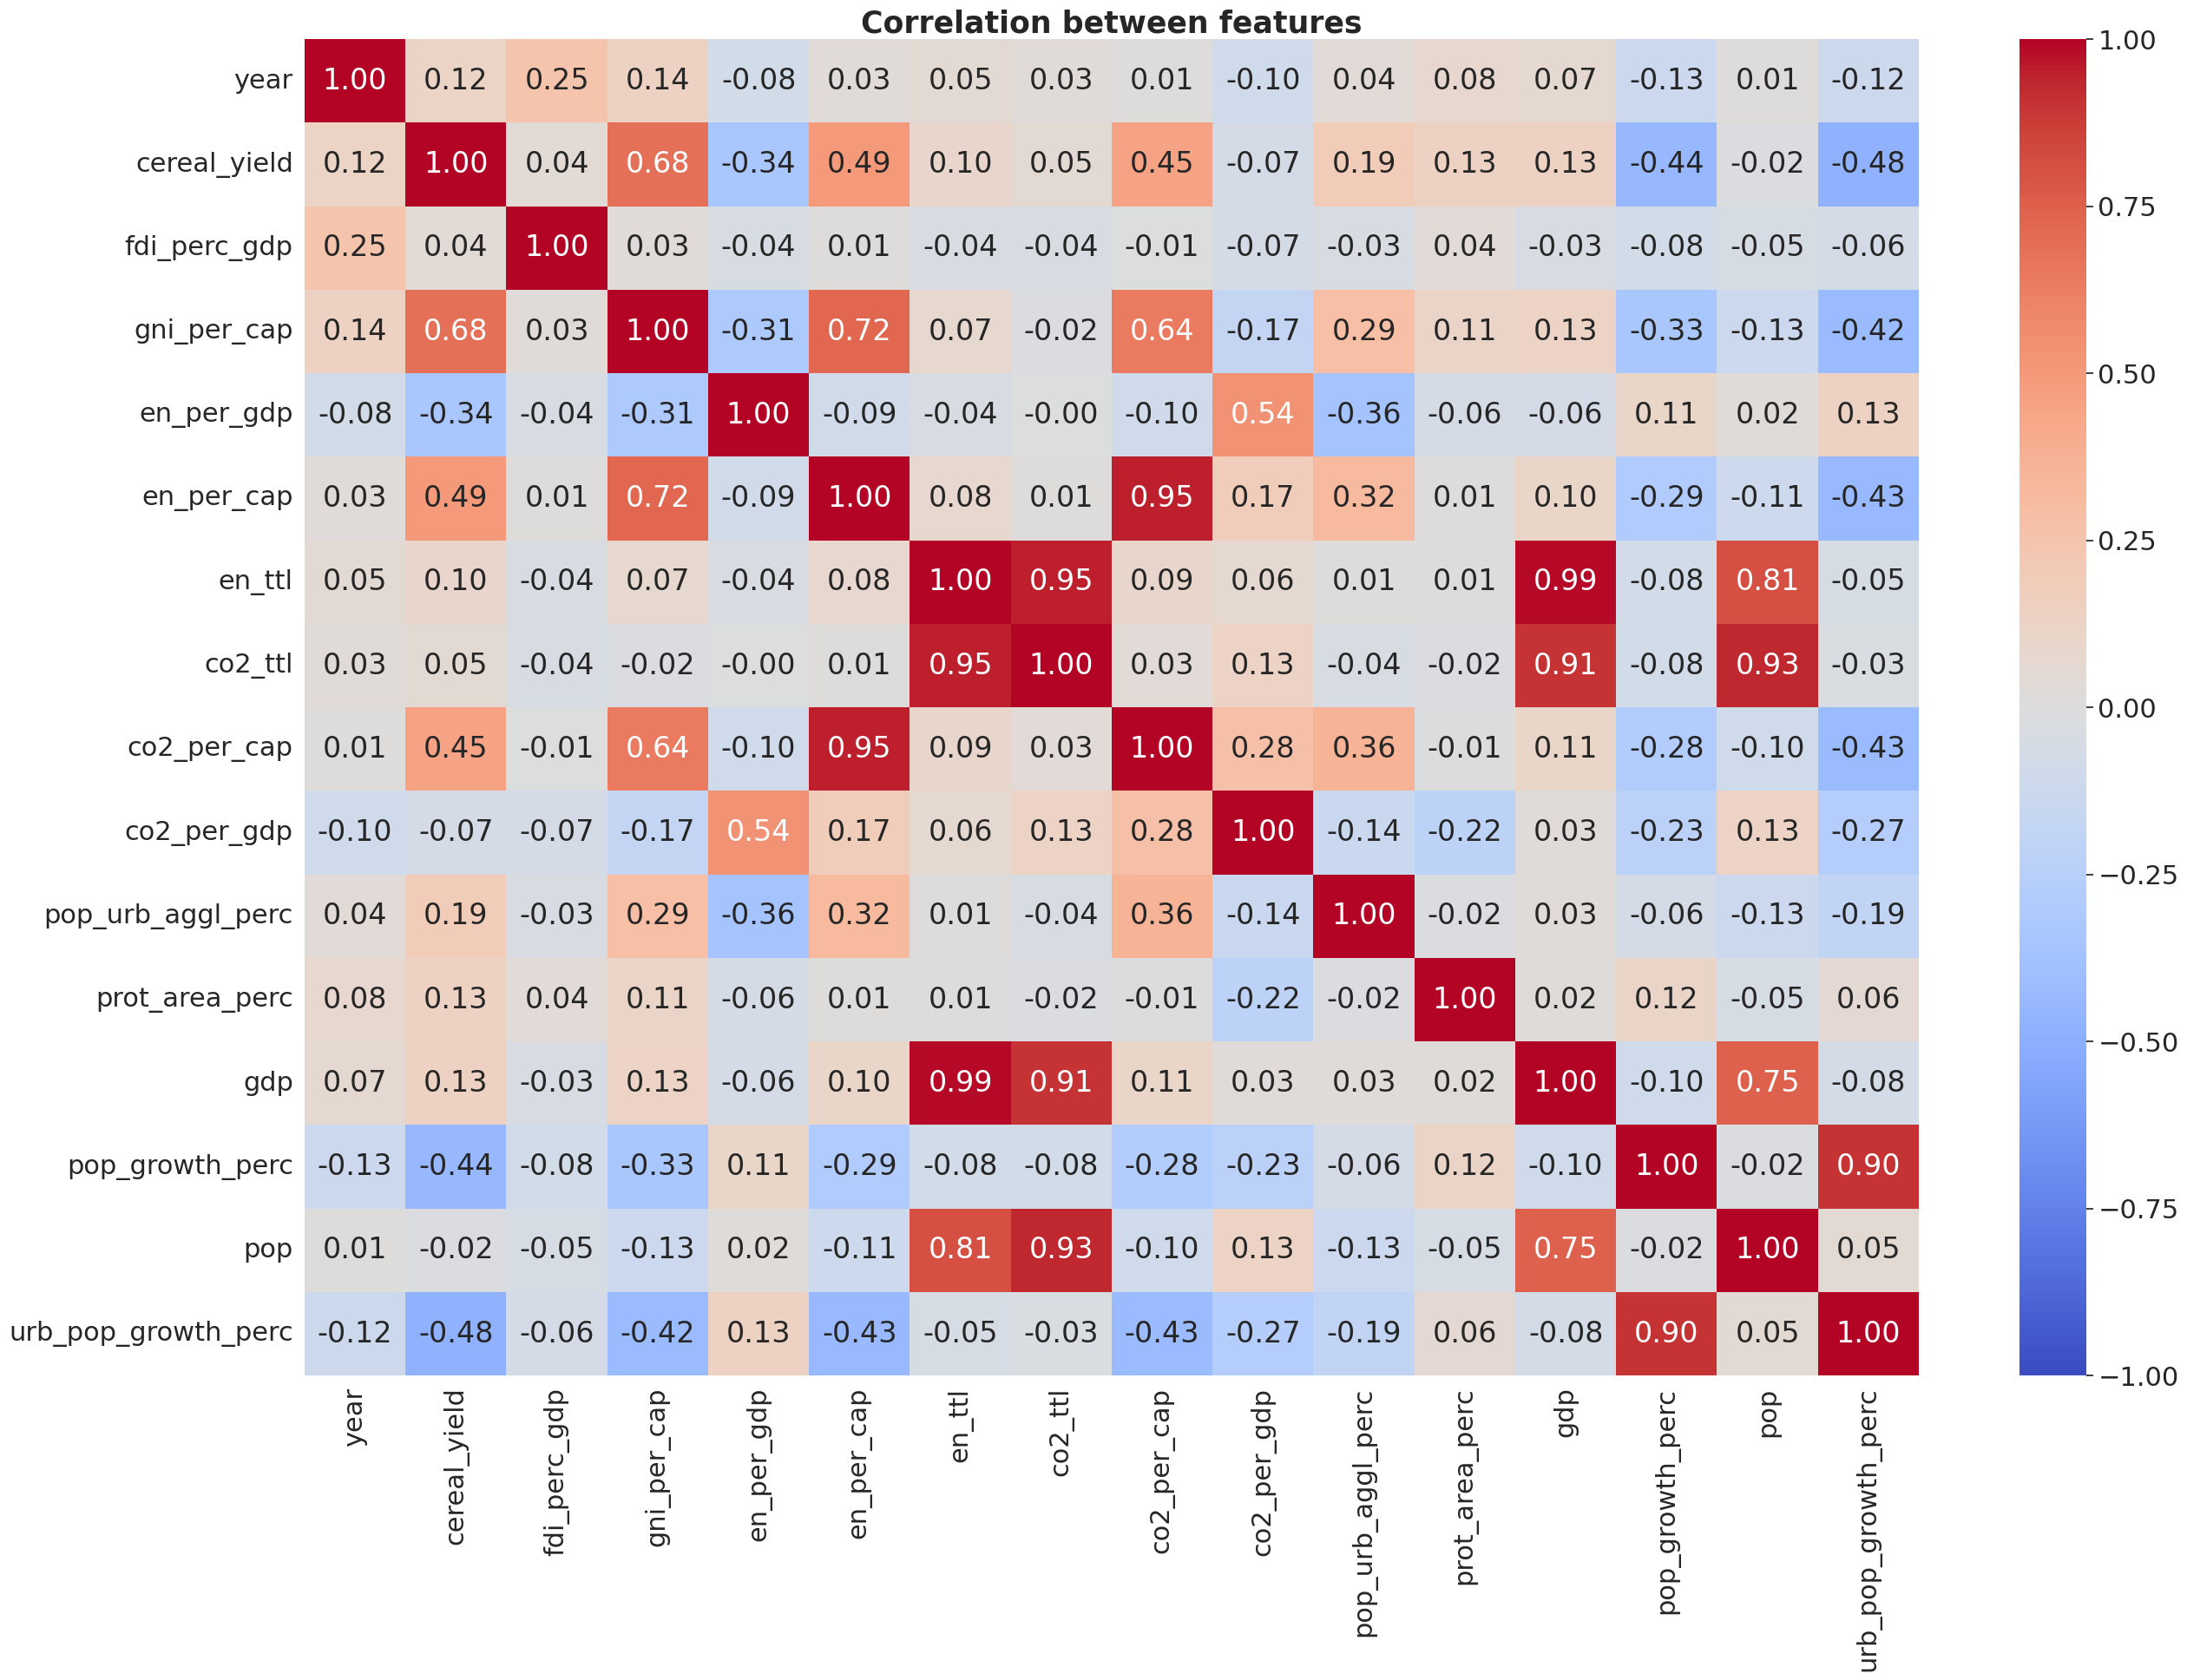

In [50]:
# sadece sayısal sütunları seç (country ve year hariç)
numeric_features = features_all.select_dtypes(include=[np.number])

# korelasyon matrisi çizimi
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=2)
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt=".2f", center=0, vmin=-1, vmax=1)
plt.title('Correlation between features', fontsize=25, weight='bold')
plt.show()

sns.set(font_scale=1)


In [59]:
features = data[['country','year','cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap', 'co2_per_cap',
                     'pop_urb_aggl_perc', 'prot_area_perc', 'gdp',  'pop_growth_perc', 'urb_pop_growth_perc']]

In [52]:
# a dictionary with feature labels
labels_dict = {'gni_per_cap':'GNI per capita [Atlas $]',
               'gdp':'Gross Domestic Product [$]',
               'cereal_yield':'Cereal yield [kg/ha]',
               'prot_area_perc': 'Nationally terrestrial protected areas [% of total land area]',
               'fdi_perc_gdp': 'Foreign Direct Investment [% of GDP]',
               'pop_urb_aggl_perc': 'Population in urban agglomerations > 1mln [%]',
               'urb_pop_growth_perc':'Urban population growth [annual %]',
               'pop_growth_perc': 'Population growth [annual %]',
               'co2_per_cap':'CO2 emissions per capita [t]',
               'en_per_cap':'Energy use per capita [kg oil eq]' }

In [53]:
# select only rows for half of the countries chosen randomly in order to ensure better visibility
chosen_countries=['LIC', 'LMC', 'LMY', 'MAR', 'MEX', 'MIC', 'MNA', 'MOZ', 'MYS',
'NGA', 'NLD', 'NZL', 'PAK', 'PAN', 'PER', 'PHL', 'PRT', 'PRY',
'ROM', 'SAS', 'SAU', 'SDN', 'SEN', 'SLV', 'SSA', 'SWE', 'SYR',
'TGO', 'THA', 'TUR', 'TZA', 'UMC', 'URY', 'USA', 'VEN', 'VNM',
'WLD', 'ZAF', 'ZAR', 'ZMB', 'ECA', 'POL', 'RUS', 'UKR', 'YEM',
'ETH', 'BEL']

features_chosen = features[features['country'].isin(chosen_countries)]

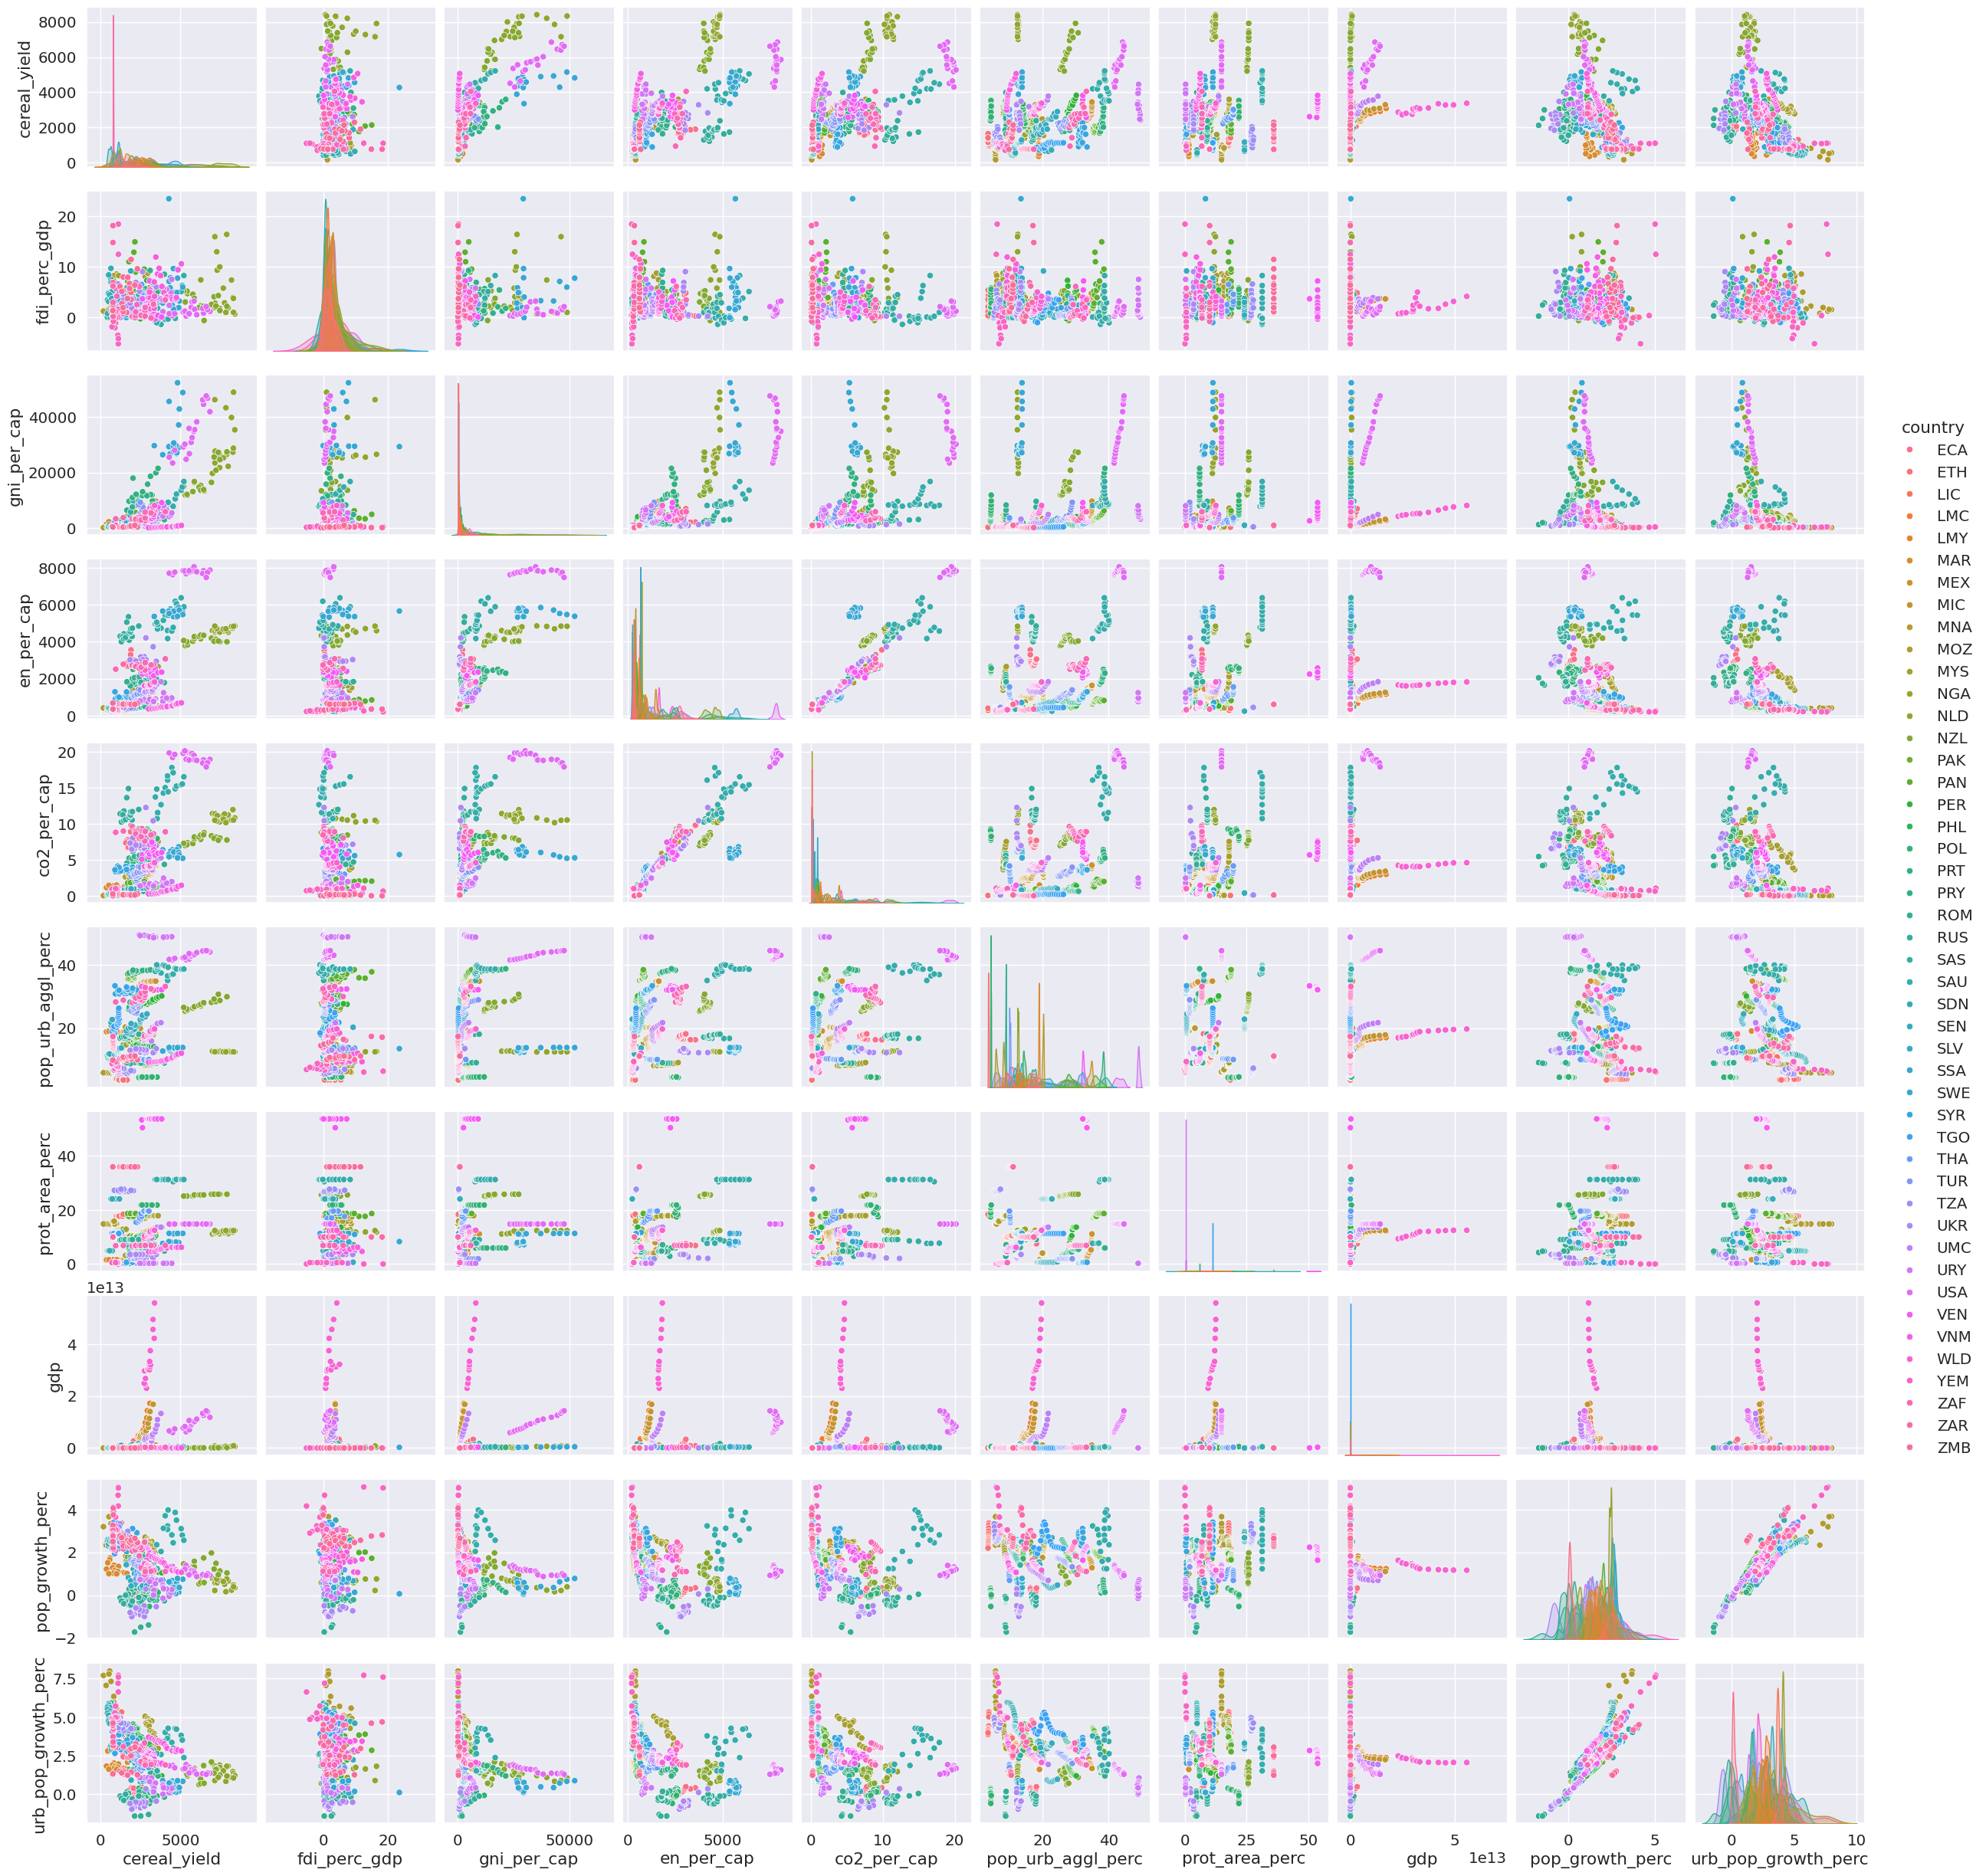

In [54]:
sns.set(font_scale=1.3)
sns.pairplot(data=features_chosen, hue='country')

In [56]:
import plotly.express as px

# Önemli değişkenleri seç
selected_cols = ['co2_per_cap', 'gni_per_cap', 'en_per_cap', 'pop_growth_perc']
features_plot = features_chosen[selected_cols + ['country']]

fig = px.scatter_matrix(features_plot,
                        dimensions=selected_cols,
                        color='country',
                        title="Simplified Interactive Scatter Matrix",
                        height=800, width=800)
fig.update_traces(diagonal_visible=True)  # Histogramlar geri açıldı
fig.show()


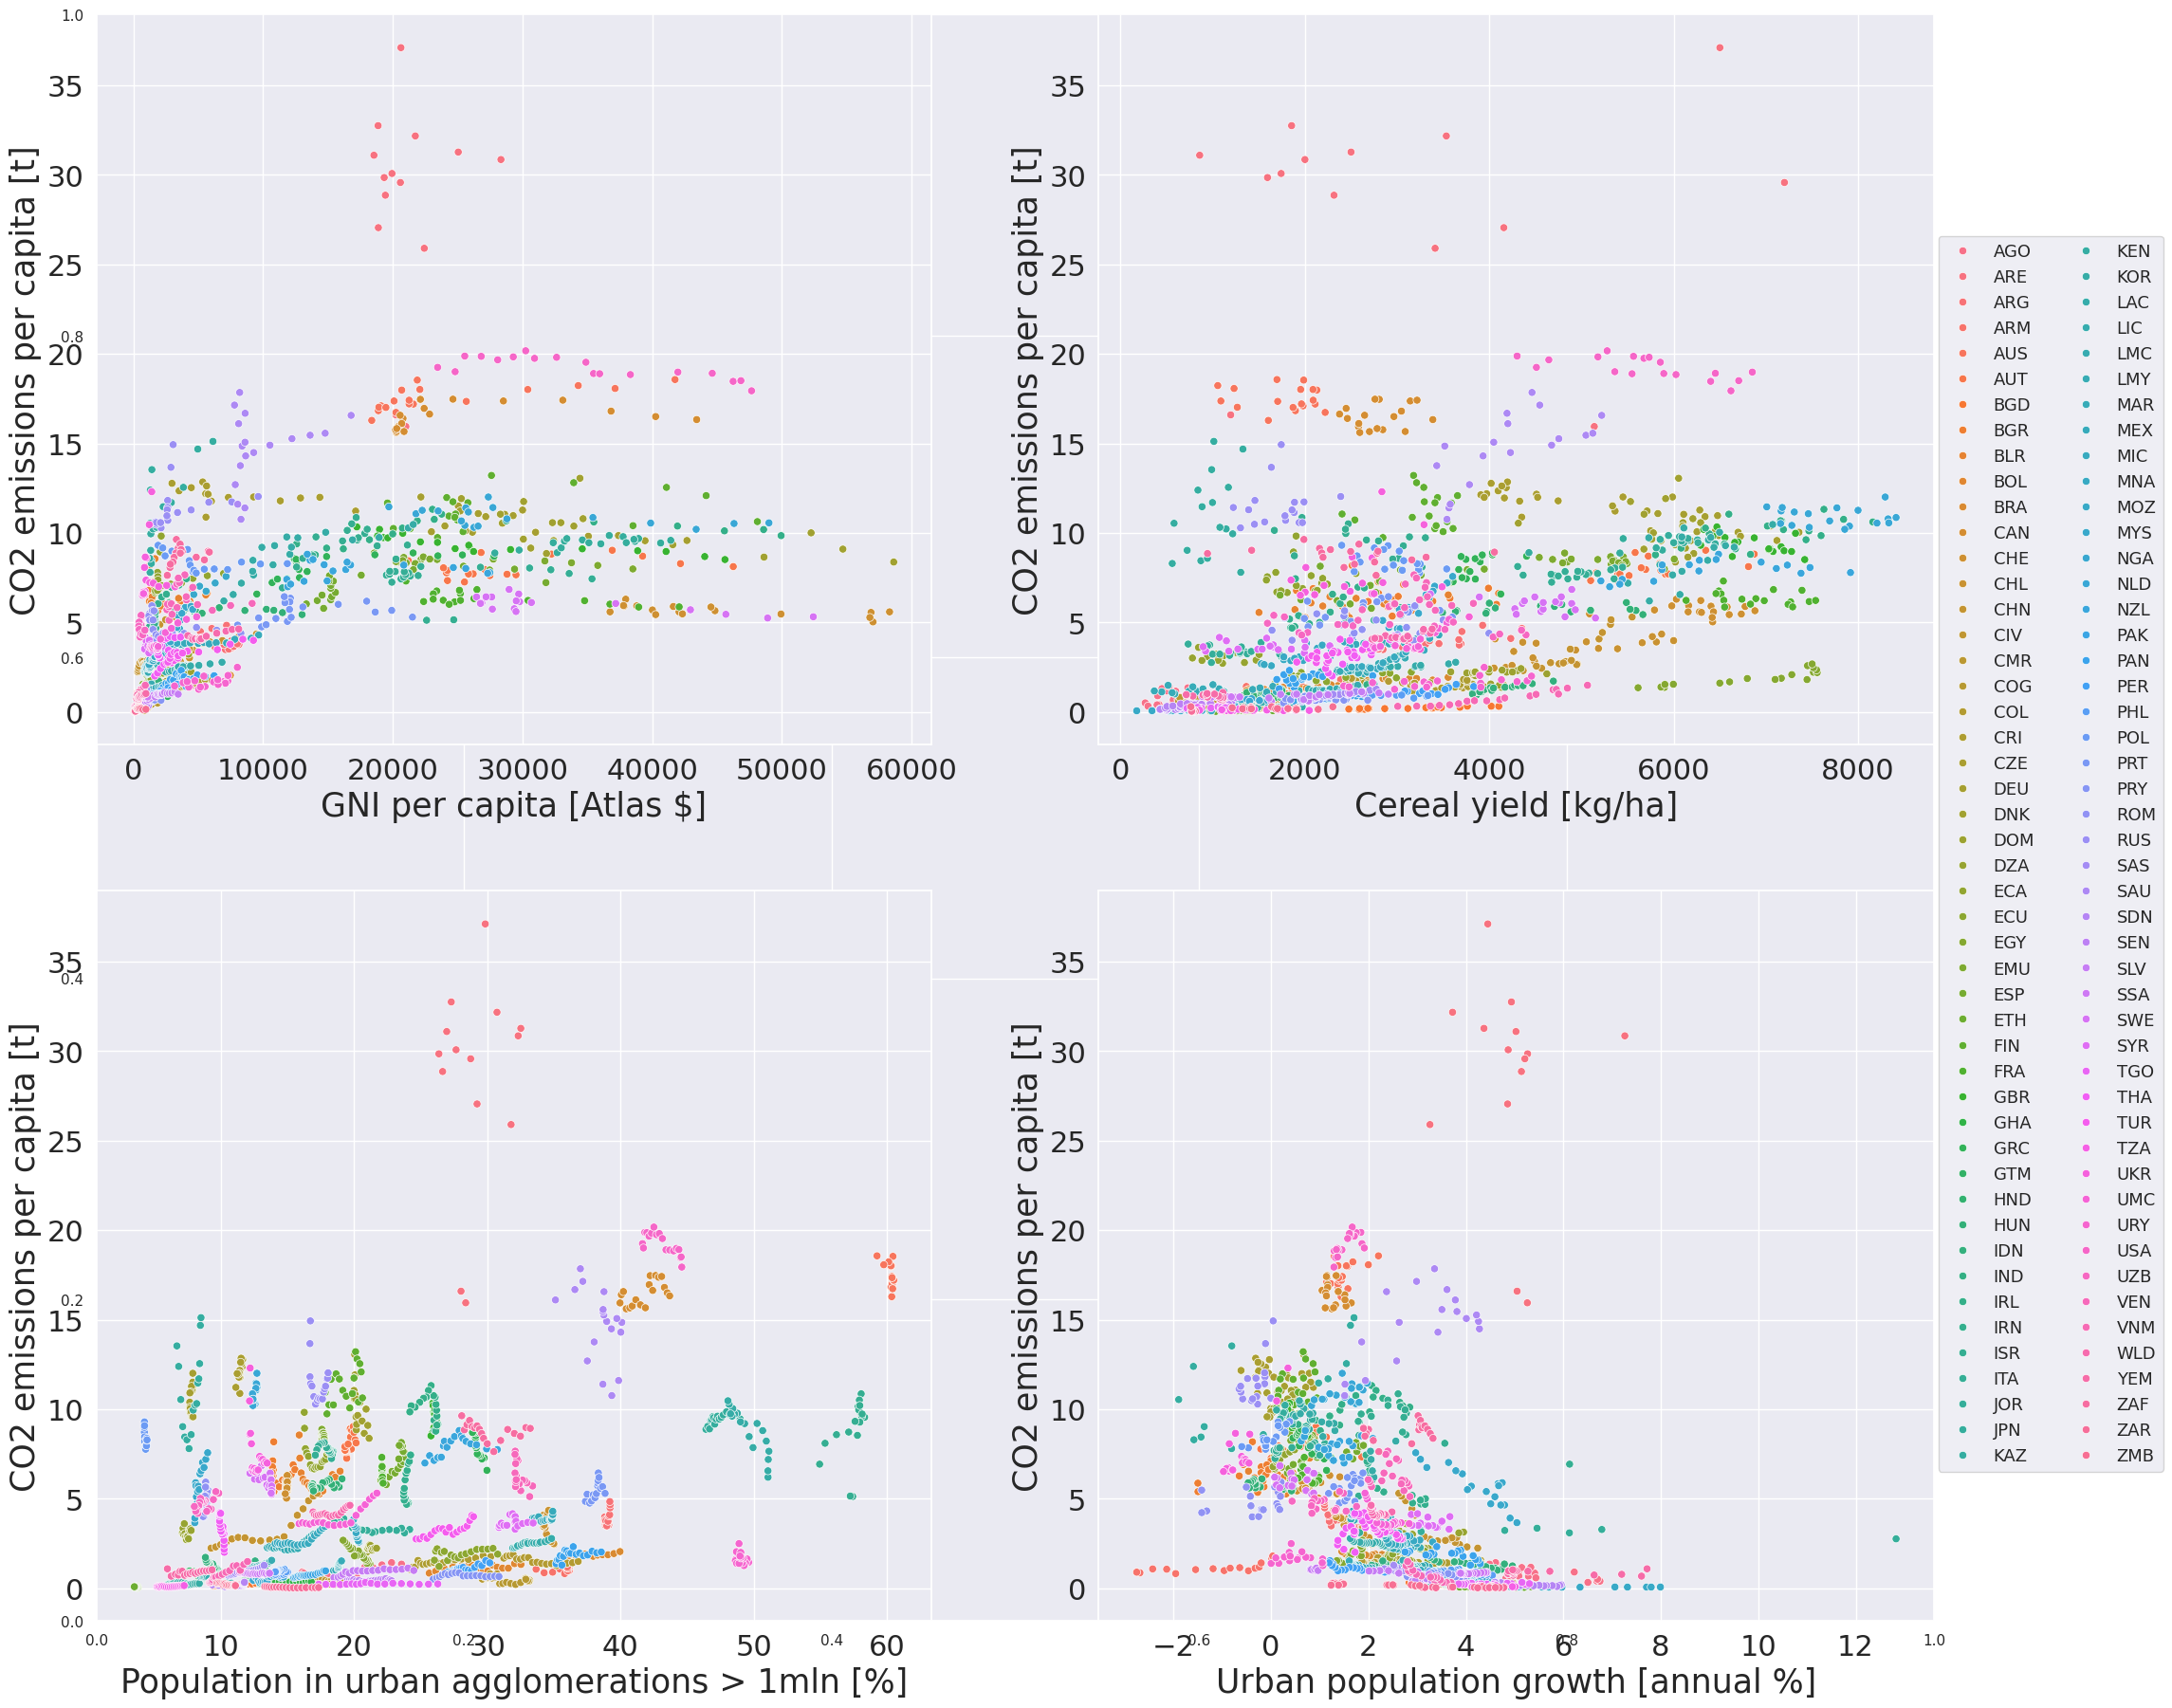

In [64]:
# set default settings of the seaborn library
sns.set()

# plot all scatterplots

fig,ax=plt.subplots(figsize=(25,22))
#fig.subplots_adjust(hspace=0.1, wspace=0.1)
ind=1


# set color theme
sns.set_context("paper")
sns.set(color_codes=True, font_scale=2)

for [col, label] in [['gni_per_cap',labels_dict['gni_per_cap']], ['cereal_yield',labels_dict['cereal_yield']], ['pop_urb_aggl_perc',labels_dict['pop_urb_aggl_perc']], ['urb_pop_growth_perc',labels_dict['urb_pop_growth_perc']]]:

    ax = fig.add_subplot(2,2,ind)
    sns.scatterplot(ax=ax, x=col, y="co2_per_cap", data=features, hue="country", legend='full')
    ax.legend_.remove()
    ax.set_xlabel(label, fontsize=25)
    ax.set_ylabel(labels_dict['co2_per_cap'], fontsize=25)
    ind+=1

# create common legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, loc='center right', fontsize=13)
plt.show()

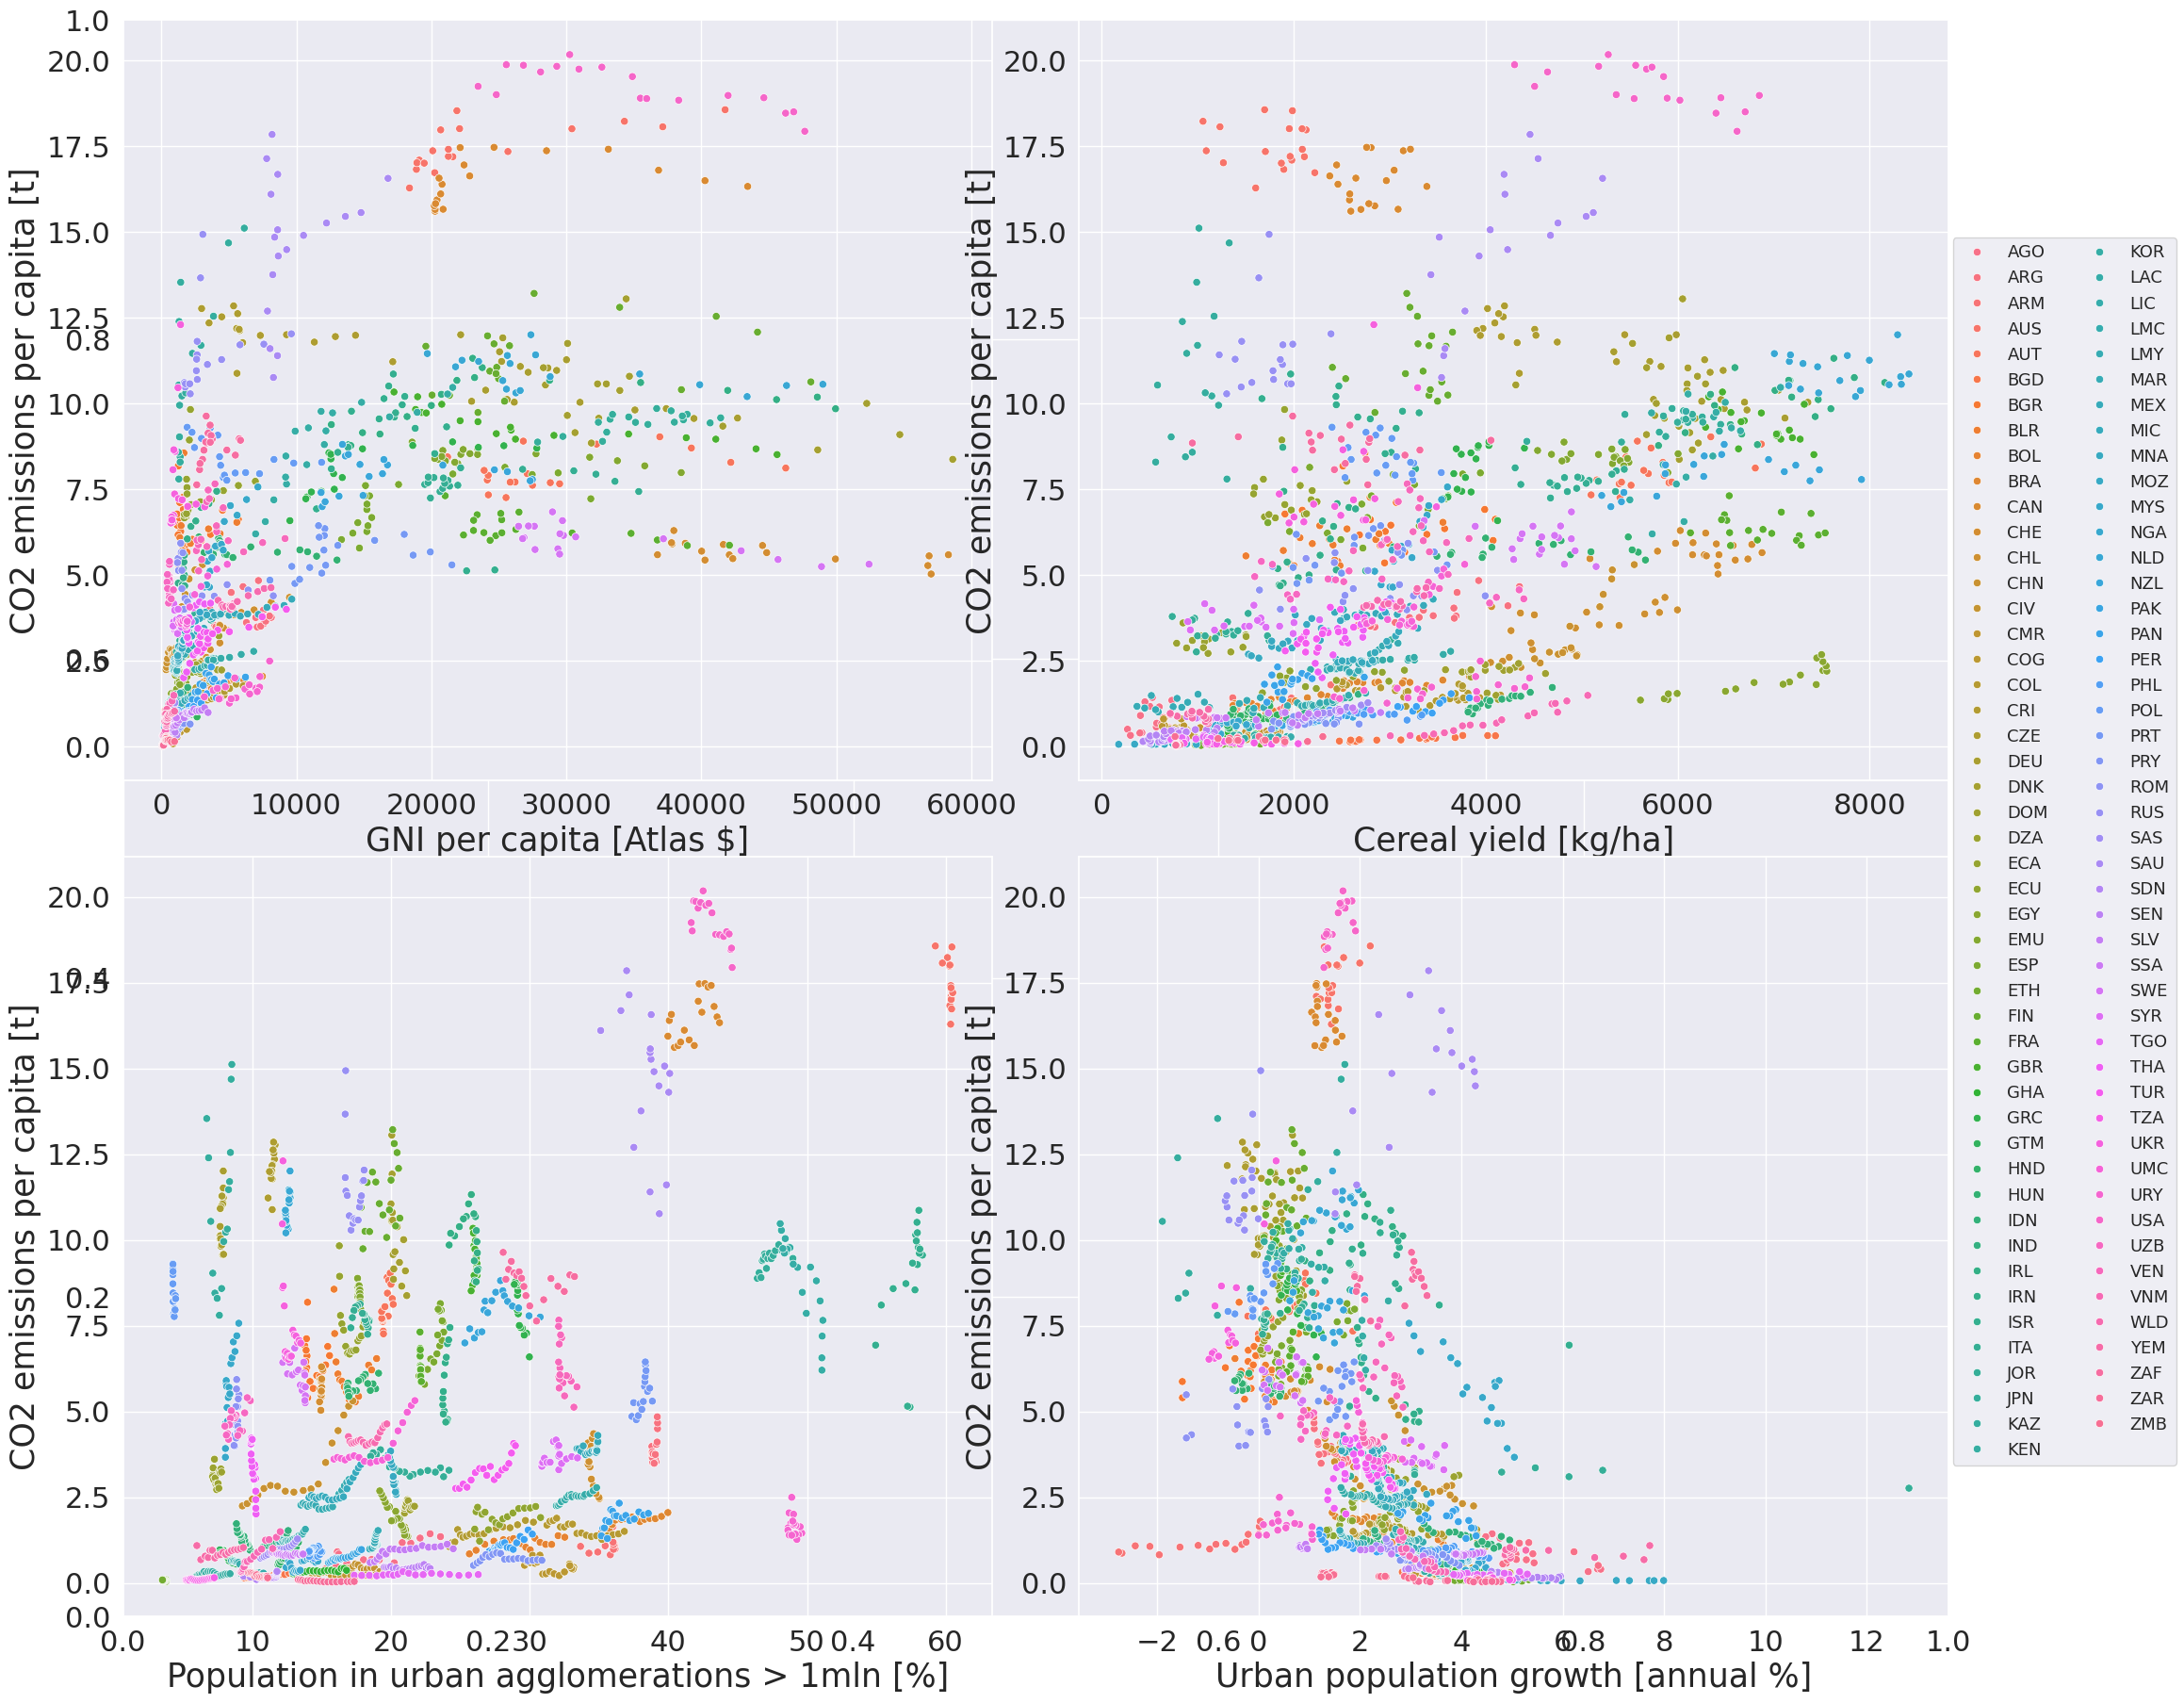

In [65]:
# remove the ARE outliers
features = features[features['country']!="ARE"]

# plot all scatterplots

fig,ax=plt.subplots(figsize=(25,22))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
ind=1

# set color theme
sns.set_context("paper")
sns.set(color_codes=True, font_scale=2)

for [col, label] in [['gni_per_cap',labels_dict['gni_per_cap']], ['cereal_yield',labels_dict['cereal_yield']], ['pop_urb_aggl_perc',labels_dict['pop_urb_aggl_perc']], ['urb_pop_growth_perc',labels_dict['urb_pop_growth_perc']]]:
    ax = fig.add_subplot(2,2,ind)
    sns.scatterplot(ax=ax, x=col, y="co2_per_cap", data=features, hue="country", legend='full')
    ax.legend_.remove()
    ax.set_xlabel(label, fontsize=25)
    ax.set_ylabel(labels_dict['co2_per_cap'], fontsize=25)
    ind+=1

# create common legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, loc='center right', fontsize=13)
plt.show()

In [68]:
import plotly.express as px

fig = px.scatter(data,
                 x="urb_pop_growth_perc",
                 y="co2_per_cap",
                 color="en_per_cap",            # renk = enerji kullanımı
                 size="pop_urb_aggl_perc",      # balon boyutu = kentleşme oranı
                 animation_frame="year",        # zaman animasyonu
                 hover_name="country",          # hover'da ülke adı
                 color_continuous_scale='Plasma',
                 size_max=60,
                 title="Urban Pop Growth vs CO2 per Capita (Animated by Year)")

# Modern ayarlarla görünümü güncelle
fig.update_layout(
    title_font_size=24,
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color='black'),
    legend_title_text='Energy per Capita',
    xaxis_title=labels_dict['urb_pop_growth_perc'],
    yaxis_title=labels_dict['co2_per_cap'],
    height=700
)

fig.show()


In [69]:
# import all needed libraries
import pandas as pd
import numpy as np
import numpy.random as nr
import sys
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.model_selection as ms
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import feature_selection as fs

# load the cleaned dataset
data = pd.read_csv(r'data_cleaned.csv')

In [70]:
# define a random state number for all random operations - ensures reproducibility of all results
random_state_num = 0

In [71]:
data.shape

(1700, 18)

In [72]:
data.head()

country  year  cereal_yield  fdi_perc_gdp  en_per_gdp  en_per_cap  \
0     AGO  1991         417.4      5.449515  179.271884  565.451027   
1     AGO  1992         397.0      4.982460  193.632183  550.548264   
2     AGO  1993         267.8      5.715529  266.318379  551.688878   
3     AGO  1994         298.4      4.195018  260.830190  541.553067   
4     AGO  1995         402.2      9.374417  237.623934  528.386164   

     co2_ttl  co2_per_cap  co2_per_gdp  pop_urb_aggl_perc  prot_area_perc  \
0   4367.397     0.409949   129.971142          15.290728       12.399822   
1   4418.735     0.401597   141.244823          15.660630       12.399823   
2   5801.194     0.510141   246.261769          16.025739       12.399823   
3   3890.687     0.331321   159.575256          16.065941       12.399824   
4  11012.001     0.909699   409.106543          16.134424       12.399825   

            gdp  gni_per_cap  under_5_mort_rate  pop_growth_perc         pop  \
0  1.219375e+10        820.0              239.1         3.034866  10653515.0   
1  5.779394e+09        470.0              235.3         3.226990  11002910.0   
2  5.285600e+09        310.0              231.1         3.297243  11371750.0   
3  4.059577e+09        190.0              226.3         3.212170  11742960.0   
4  5.039535e+09        320.0              221.5         3.037335  12105105.0   

   urb_pop_growth_perc      urb_pop  
0             6.687032  4099472.572  
1             6.750459  4385759.926  
2             6.700777  4689709.700  
3             6.503667  5004849.552  
4             6.223936  5326246.200

In [75]:
import plotly.express as px

fig = px.choropleth(features_chosen,
                    locations="country",                # ISO-3 kodları (örneğin: 'TUR', 'USA')
                    color="co2_per_cap",                # renk tonu bu değişkene göre
                    hover_name="country",               # hover'da ülke adı
                    color_continuous_scale="Reds",      # renk paleti
                    title="CO₂ per Capita by Country")

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False, projection_type='natural earth'),
    title_font_size=22,
    coloraxis_colorbar=dict(title="CO₂ / Capita (tons)")
)

fig.show()


In [76]:
import plotly.express as px

fig = px.choropleth(features_chosen,
                    locations="country",                 # ISO-3 ülke kodları ('USA', 'TUR', 'DEU', ...)
                    color="gni_per_cap",                 # Harita rengini bu değişkene göre ayarla
                    hover_name="country",                # Hover’da ülke adı görünsün
                    color_continuous_scale="Blues",      # Renk skalası
                    title="GNI per Capita by Country")   # Harita başlığı

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='natural earth'  # Daha düzgün dünya projeksiyonu
    ),
    coloraxis_colorbar=dict(title="GNI / Capita (USD)")  # Sağdaki renk skalası başlığı
)

fig.show()


In [78]:
# remove the ARE outliers
data = data[data['country']!='ARE']

# print shape after removing the outliers
print("Shape of the dataset after removing the ARE outliers:")
data.shape

Shape of the dataset after removing the ARE outliers:


(1686, 18)

In [79]:
# choose features and label columns
feature_cols = ['cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap', 'pop_urb_aggl_perc',
                    'prot_area_perc', 'gdp',  'pop_growth_perc', 'urb_pop_growth_perc']
label_col = ['co2_per_cap']

# convert into nympy arrays (required for scikit-learn models)
features = np.array(data[feature_cols])
labels =  np.array(data[label_col])

In [80]:
# split into training and testing subsets
nr.seed(1)
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.7,
                                                                            random_state=random_state_num)

In [81]:
# Set folds for cross validation for the feature selection
nr.seed(1)
feature_folds = ms.KFold(n_splits=4, shuffle = True, random_state=random_state_num)

# Define the model
rf_selector = RandomForestRegressor(random_state=random_state_num)

# Define an objects for a model for recursive feature elimination with CV
nr.seed(1)
selector = fs.RFECV(estimator = rf_selector, cv = feature_folds, scoring = 'r2', n_jobs=-1)

selector = selector.fit(features_train, np.ravel(labels_train))
selector.support_

print("Feature ranking after RFECV:")
print(selector.ranking_)

# print the important features
ranks_transform = list(np.transpose(selector.ranking_))
chosen_features = [i for i,j in zip(feature_cols,ranks_transform) if j==1]
print("Chosen important features:")
print(chosen_features)

Feature ranking after RFECV:
[4 7 2 1 1 3 6 1 5]
Chosen important features:
['en_per_cap', 'pop_urb_aggl_perc', 'pop_growth_perc']


In [82]:
# assign only the important variables to the features array of both training and testing dataset
features_train_reduced = selector.transform(features_train)
features_test_reduced = selector.transform(features_test)

print("Training subset shape before the recursive feature elimination:")
print(features_train.shape)
print("Training subset array shape after the recursive feature elimination:")
print(features_train_reduced.shape)
print("Test subset array shape after the recursive feature elimination:")
print(features_test_reduced.shape)

Training subset shape before the recursive feature elimination:
(505, 9)
Training subset array shape after the recursive feature elimination:
(505, 3)
Test subset array shape after the recursive feature elimination:
(1181, 3)


In [83]:
# Define value ranges for each hyperparameter
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

# Create the hyperparameter grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [84]:
# define the cross-validation folds for the hyperparameter tuning
nr.seed(1)
inside_folds = ms.KFold(n_splits=5, shuffle = True, random_state=random_state_num)

# Define the random forest regressor model object
rf_tuner = RandomForestRegressor(random_state=random_state_num)

# Perform a randomized search on the grid
nr.seed(1)
rf_model = ms.RandomizedSearchCV(estimator=rf_tuner, param_distributions = param_grid,
                                 random_state=random_state_num, refit=True,
                                 cv=inside_folds, scoring = 'r2', return_train_score=True, n_jobs=-1)

In [85]:
# Fit the grid search model object with cross-validation on the data
rf_model.fit(features_train_reduced, np.ravel(labels_train))

# Print the best parameter value
best_n_estimators = rf_model.best_estimator_.n_estimators
best_max_features = rf_model.best_estimator_.max_features

print("best number of estimators:")
print(best_n_estimators)
print("best max_features:")
print(best_max_features)
print("max_depth:")
print(rf_model.best_estimator_.max_depth)
print("min_samples_split")
print(rf_model.best_estimator_.min_samples_split)
print("min_samples_leaf")
print(rf_model.best_estimator_.min_samples_leaf)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning:


15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

best number of estimators:
1600
best max_features:
sqrt
max_depth:
20
min_samples_split
2
min_samples_leaf
1


In [86]:
# pick the model with the best hyperparameter combination for further analysis
rf_best_model = rf_model.best_estimator_

In [87]:
# define the cross-validation folds for the evaluation
nr.seed(1)
outside_folds = ms.KFold(n_splits=10, shuffle = True, random_state=random_state_num)

# Evaluate the model on the training subset with cross-validation
nr.seed(1)
cv_eval = cross_val_score(rf_best_model, features_train_reduced, labels_train, cv = outside_folds, n_jobs=-1)

print('Mean R2 score of all CV folds = %4.3f' % np.mean(cv_eval))
print('Standard deviation of the R2 score over all folds = %4.3f' % np.std(cv_eval))
print('R2 score for each fold:')

# print the R2 score for each fold
for i, j in enumerate(cv_eval):
    print('Fold %2d    %4.3f' % (i+1, j))

Mean R2 score of all CV folds = 0.953
Standard deviation of the R2 score over all folds = 0.025
R2 score for each fold:
Fold  1    0.964
Fold  2    0.895
Fold  3    0.922
Fold  4    0.969
Fold  5    0.941
Fold  6    0.973
Fold  7    0.969
Fold  8    0.959
Fold  9    0.955
Fold 10    0.980


In [88]:
# make predictions from the features of the testing subset
predictions = rf_best_model.predict(features_test_reduced)

# import the functions for the metrics evaluation
from sklearn.metrics import r2_score, mean_squared_error

# calculate the metrics basing on the predicted and true values for the test subset
r2 = r2_score(y_true=labels_test, y_pred=predictions)
mse = mean_squared_error(y_true=labels_test, y_pred=predictions)
rmse = np.sqrt(mse)

print("R2=")
print(r2)
print("Mean Squared Error: MSE=")
print(mse)
print("Root Mean Squared Error: RMSE=")
print(rmse)

R2=
0.9693237222824129
Mean Squared Error: MSE=
0.5966720366362253
Root Mean Squared Error: RMSE=
0.7724454910453069


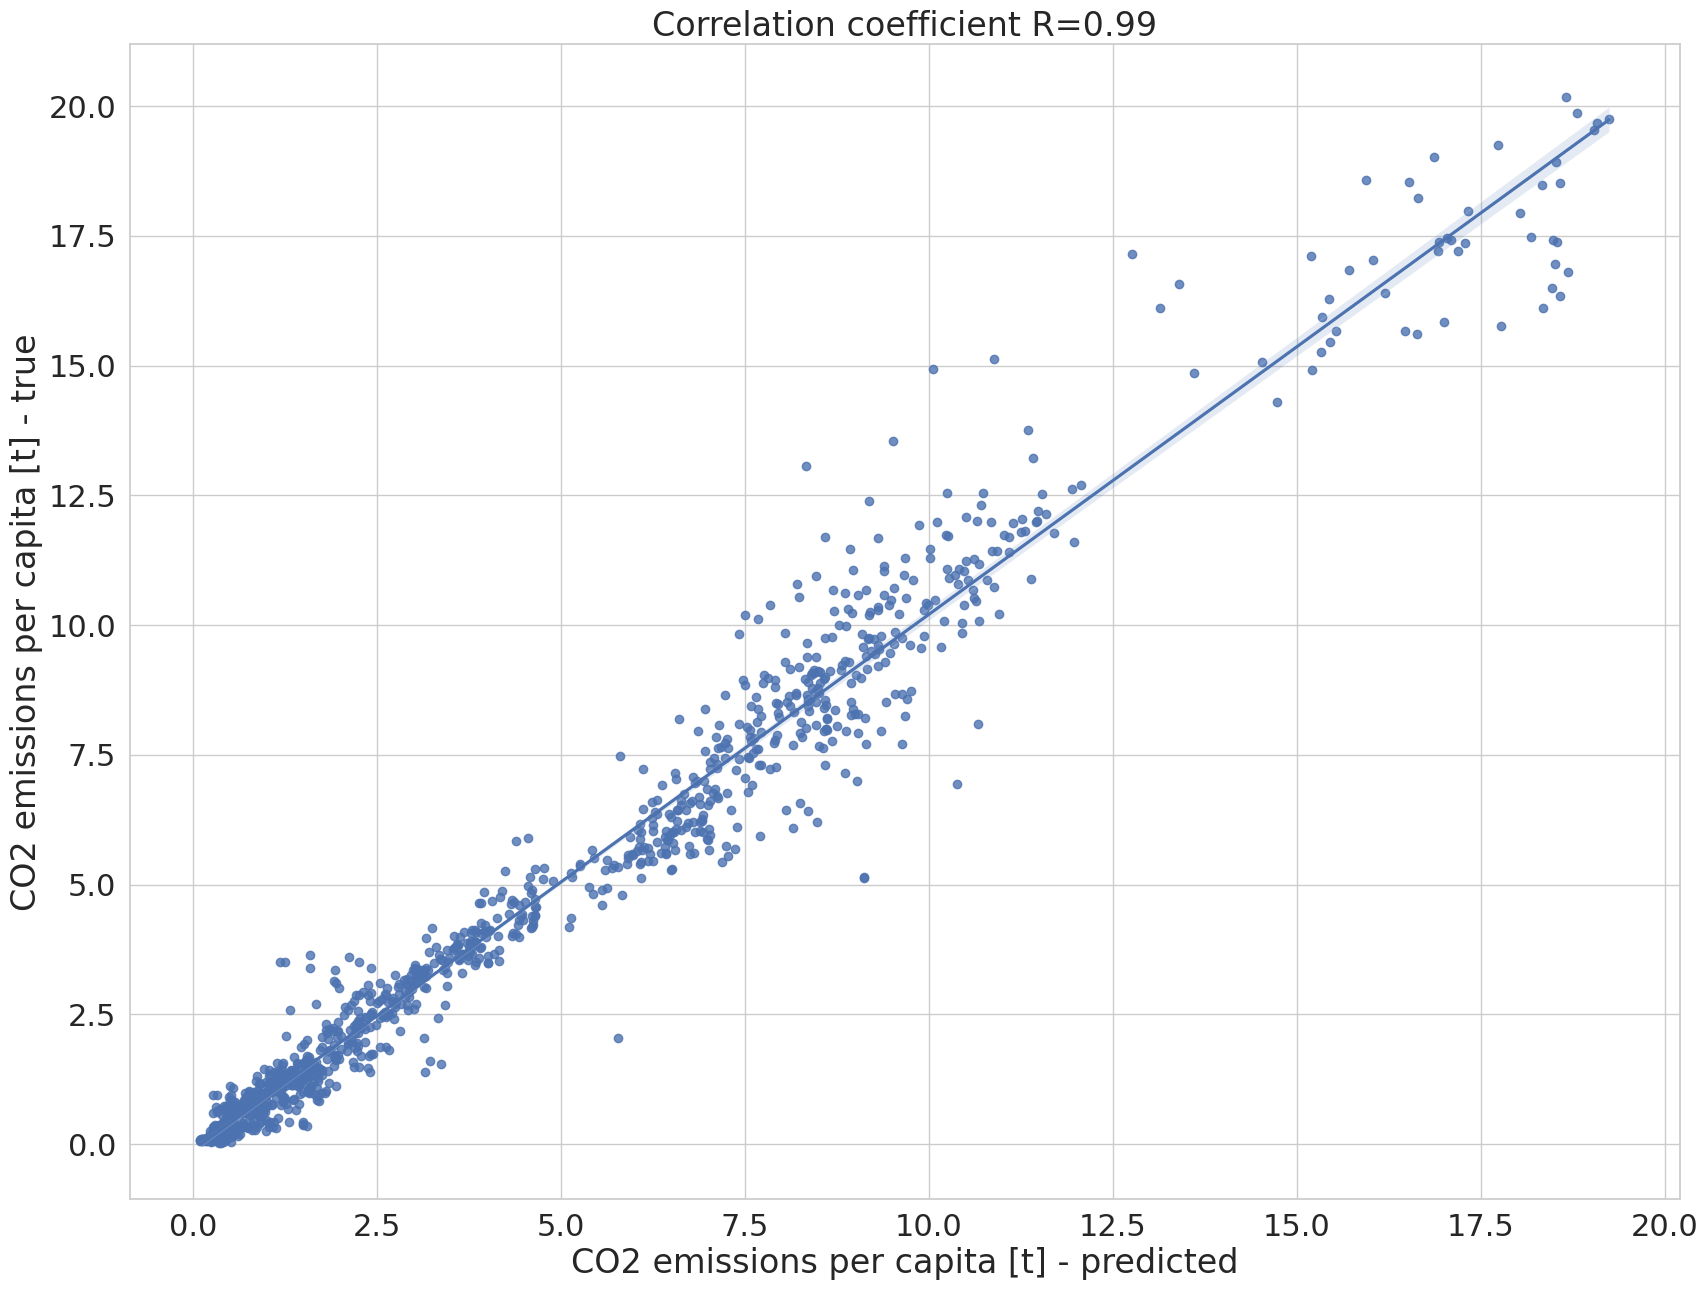

In [89]:
# plot predicted vs true values of the test subset

f,ax=plt.subplots(figsize=(20,15))
sns.set(font_scale=2)

sns.regplot(x=predictions, y=np.transpose(labels_test)[0,:], fit_reg=True)
plt.xlabel("CO2 emissions per capita [t] - predicted")
plt.ylabel("CO2 emissions per capita [t] - true")
plt.title("Correlation coefficient R="+str(round(np.corrcoef(predictions,np.transpose(labels_test)[0,:])[0,1],2)))
plt.show()

In [91]:
import plotly.express as px
import pandas as pd
import numpy as np

# 1D düz hale getir
labels_test = np.ravel(labels_test)
predictions = np.ravel(predictions)

# Veriyi birleştir
df_eval = pd.DataFrame({
    "True Value": labels_test,
    "Predicted Value": predictions
})
df_eval["Error"] = df_eval["True Value"] - df_eval["Predicted Value"]

# Interaktif scatter plot
fig = px.scatter(df_eval,
                 x="True Value",
                 y="Predicted Value",
                 color="Error",
                 color_continuous_scale="RdBu",
                 title="Predicted vs True Values (Interactive)",
                 height=600)

# Mükemmel tahmin çizgisi (y = x)
fig.add_shape(type="line",
              x0=df_eval["True Value"].min(), y0=df_eval["True Value"].min(),
              x1=df_eval["True Value"].max(), y1=df_eval["True Value"].max(),
              line=dict(color="green", dash="dash"))

fig.update_layout(
    xaxis_title="True Value",
    yaxis_title="Predicted Value",
    coloraxis_colorbar=dict(title="Error")
)

fig.show()


In [92]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import os

# Y düzleştir
y_true = np.ravel(labels_test)
y_pred = np.ravel(predictions)

# Metrikleri hesapla
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_true, y_pred)

# Dataframe'e dök
report_df = pd.DataFrame({
    "Metric": ["R² Score", "MAE", "MSE", "RMSE", "MAPE"],
    "Value": [r2, mae, mse, rmse, mape]
})
report_df["Value"] = report_df["Value"].round(4)

# ✨ 1. Metrik Tablosu
table_fig = go.Figure(data=[go.Table(
    header=dict(values=["<b>Metric</b>", "<b>Value</b>"],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[report_df.Metric, report_df.Value],
               fill_color='lavender',
               align='left'))
])
table_fig.update_layout(title_text="Regression Evaluation Report")

# ✨ 2. True vs Predicted Scatter
scatter_df = pd.DataFrame({"True": y_true, "Predicted": y_pred})
scatter_fig = px.scatter(scatter_df, x="True", y="Predicted", color=(scatter_df["True"] - scatter_df["Predicted"]),
                         color_continuous_scale="RdBu", title="True vs Predicted Values",
                         labels={"color": "Error"})

# ✨ 3. Error Histogram
error_df = pd.DataFrame({"Error": y_true - y_pred})
hist_fig = px.histogram(error_df, x="Error", nbins=30, title="Error Distribution")

# 📤 4. Hepsini tek HTML'e kaydet
from plotly.subplots import make_subplots
with open("regression_report.html", "w") as f:
    f.write("<h1 style='font-family:sans-serif;'>📊 Regression Model Report</h1>")
    f.write("<h2>🔹 Metrics Table</h2>")
    f.write(table_fig.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write("<h2>🔹 True vs Predicted</h2>")
    f.write(scatter_fig.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write("<h2>🔹 Error Distribution</h2>")
    f.write(hist_fig.to_html(full_html=False, include_plotlyjs='cdn'))

print("✅ HTML rapor başarıyla oluşturuldu: regression_report.html")


✅ HTML rapor başarıyla oluşturuldu: regression_report.html
